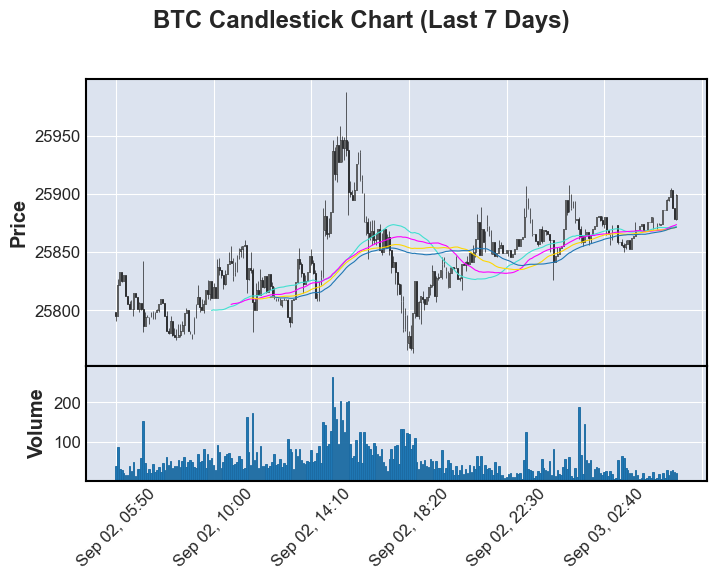

In [7]:
import pandas as pd
import mplfinance as mpl

# Load the BTC data
btc_df = pd.read_csv("BTC_99.csv")

# Parse the "date" column into a datetime format
btc_df['date'] = pd.to_datetime(btc_df['date'])

# Set the datetime as the index
btc_df.set_index('date', inplace=True)

# Drop the unnecessary column
btc_df.drop(columns=['Unnamed: 0'], inplace=True)

# Select only the last 7 days of data for plotting
last_7_days = btc_df.last('1D')

# Plotting the candlestick chart with moving averages (calculated from all data) and volume for the last 7 days
fig, axes = mpl.plot(last_7_days, type='candle', mav=(50, 60,70,80), show_nontrading=False, volume=True, figratio=(12, 8), title="BTC Candlestick Chart (Last 7 Days)", style='default', returnfig=True)

# Save the figure as a high-resolution image
fig.savefig("btc_candlestick_chart.png", dpi=300)


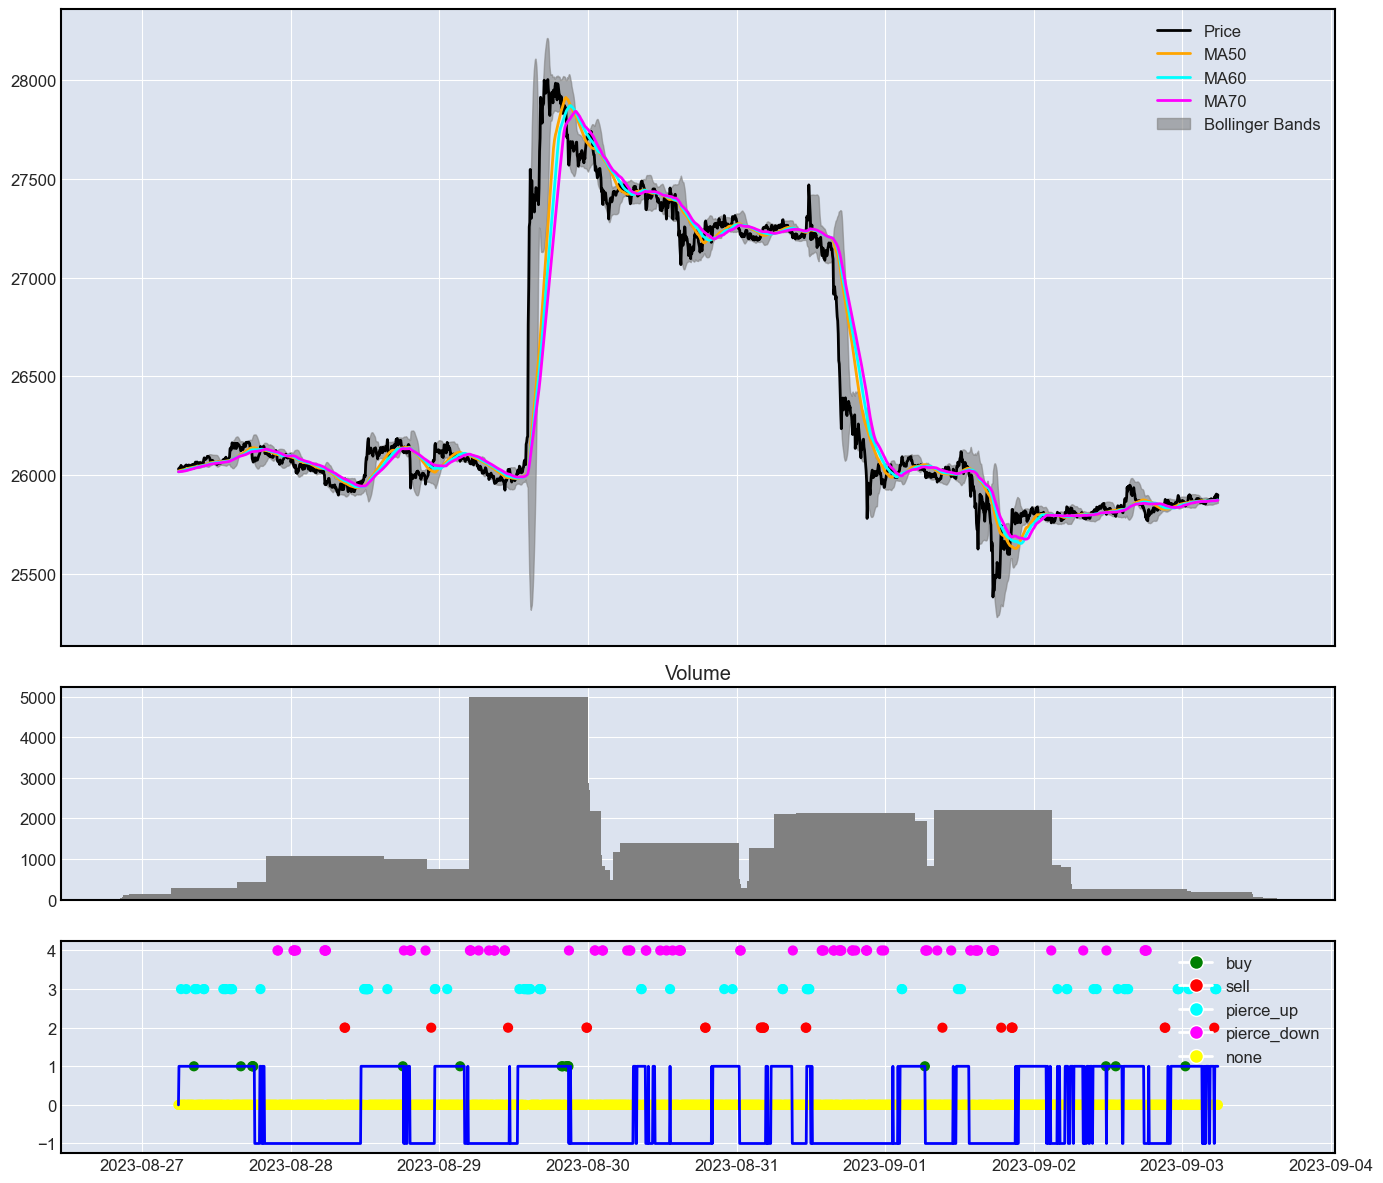

In [16]:
# Sample code provided to the user

# Load data
data = pd.read_csv('BTC_99.csv')

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Calculate MAs
data['MA50'] = data['close'].rolling(window=50).mean()
data['MA60'] = data['close'].rolling(window=60).mean()
data['MA70'] = data['close'].rolling(window=70).mean()

# Bollinger Bands
data['SMA20'] = data['close'].rolling(window=20).mean()
data['STD20'] = data['close'].rolling(window=20).std()
data['Upper_BB'] = data['SMA20'] + (data['STD20'] * 2)
data['Lower_BB'] = data['SMA20'] - (data['STD20'] * 2)

# Extract recent 7 days of data
recent_7_days_data_BB = data.tail(7 * 24 * 12).copy()  # Added .copy() to avoid SettingWithCopyWarning

# Detect piercing events
recent_7_days_data_BB.loc[:, 'Pierce_Upper'] = recent_7_days_data_BB['close'] > recent_7_days_data_BB['Upper_BB']
recent_7_days_data_BB.loc[:, 'Pierce_Lower'] = recent_7_days_data_BB['close'] < recent_7_days_data_BB['Lower_BB']

# Detect scattering direction
recent_7_days_data_BB.loc[:, 'MA_Scatter'] = recent_7_days_data_BB[['MA50', 'MA60', 'MA70']].diff().sum(axis=1).apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'flat'))

# Assign signals based on piercing and scattering
recent_7_days_data_BB.loc[:, 'Signal'] = np.select(conditions, choices, default='none')

# Map signal strings to numerical values for plotting
signal_mapping = {'none': 0, 'buy': 1, 'sell': 2, 'pierce_up': 3, 'pierce_down': 4}
recent_7_days_data_BB['Signal_Num'] = recent_7_days_data_BB['Signal'].map(signal_mapping)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})
ax1.plot(recent_7_days_data_BB['date'], recent_7_days_data_BB['close'], label='Price', color='black')
ax1.plot(recent_7_days_data_BB['date'], recent_7_days_data_BB['MA50'], label='MA50', color='orange')
ax1.plot(recent_7_days_data_BB['date'], recent_7_days_data_BB['MA60'], label='MA60', color='cyan')
ax1.plot(recent_7_days_data_BB['date'], recent_7_days_data_BB['MA70'], label='MA70', color='magenta')
ax1.fill_between(recent_7_days_data_BB['date'], recent_7_days_data_BB['Upper_BB'], recent_7_days_data_BB['Lower_BB'], color='grey', alpha=0.6, label='Bollinger Bands')
ax1.legend()

ax2.bar(recent_7_days_data_BB['date'], recent_7_days_data_BB['volume'], color='gray')
ax2.set_title('Volume')

# Signals and trends subplot
colors = {'buy': 'green', 'sell': 'red', 'pierce_up': 'cyan', 'pierce_down': 'magenta', 'none': 'yellow'}
scatter_legend = [plt.Line2D([0], [0], marker='o', color='w', label=signal, markersize=10, markerfacecolor=colors[signal]) for signal in colors]
ax3.scatter(recent_7_days_data_BB['date'], recent_7_days_data_BB['Signal_Num'], c=recent_7_days_data_BB['Signal'].map(colors), s=40)
ax3.plot(recent_7_days_data_BB['date'], recent_7_days_data_BB['MA_Scatter'].map({'up': 1, 'down': -1, 'flat': 0}), color='blue', label='Trend')
ax3.legend(handles=scatter_legend)

plt.tight_layout()
plt.show()



In [9]:
recent_7_days_data_BB

,Unnamed: 0,date,open,high,low,close,volume,MA50,MA60,MA70,SMA20,STD20,Upper_BB,Lower_BB,Pierce_Upper,Pierce_Lower,MA_Scatter,Signal
26566,26566,2023-08-27 05:50:00+00:00,26031.43,26031.44,26030.12,26030.13,14.57388,26019.6764,26015.877667,26016.003429,26033.4040,5.334167,26044.072334,26022.735666,False,False,flat,none
26567,26567,2023-08-27 05:55:00+00:00,26030.12,26033.53,26029.88,26033.52,40.62880,26020.6120,26016.436167,26016.354429,26033.8575,4.900803,26043.659106,26024.055894,False,False,up,none
26568,26568,2023-08-27 06:00:00+00:00,26033.52,26034.90,26033.52,26034.90,9.27098,26021.5918,26017.131167,26016.671143,26034.3800,4.373756,26043.127513,26025.632487,False,False,up,none
26569,26569,2023-08-27 06:05:00+00:00,26034.89,26034.93,26034.89,26034.92,10.74238,26022.3354,26017.517833,26016.884286,26034.6045,4.274442,26043.153384,26026.055616,False,False,up,none
26570,26570,2023-08-27 06:10:00+00:00,26034.93,26034.93,26034.92,26034.93,26.96888,26023.0272,26017.932667,26016.994286,26034.8295,4.160043,26043.149587,26026.509413,False,False,up,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,28577,2023-09-03 05:25:00+00:00,25894.77,25897.09,25893.77,25897.09,18.18597,25871.0736,25870.597000,25869.554571,25875.2755,9.388704,25894.052908,25856.498092,True,False,up,pierce_up
28578,28578,2023-09-03 05:30:00+00:00,25897.08,25905.00,25897.08,25903.06,27.96760,25871.2544,25871.619667,25870.093714,25877.3295,10.725369,25898.780238,25855.878762,True,False,up,pierce_up
28579,28579,2023-09-03 05:35:00+00:00,25903.05,25903.06,25887.63,25887.63,29.83875,25871.4632,25872.305167,25870.500143,25878.5155,10.471823,25899.459147,25857.571853,False,False,up,none
28580,28580,2023-09-03 05:40:00+00:00,25887.63,25887.64,25878.70,25878.71,25.96047,25871.4752,25872.808833,25870.811143,25879.0150,10.215104,25899.445208,25858.584792,False,False,up,none
